# 🎮 مقدمة
في هذا المشروع، أشتغل على تحليل بيانات من لعبة بسيطة. الهدف هو أتعرف على سلوك اللاعبين، وأشوف إذا في أشياء نقدر نحسّنها في طريقة تصميم اللعبة.

# 📋 وصف البيانات
البيانات اللي عندي تحتوي على معلومات عن الجلسات، مثل:
- وقت بداية الجلسة
- مدتها بالثواني
- عدد القفزات
- عدد النقاط
- عدد العقبات اللي تجاوزها اللاعب

قمت بتنظيف الأعمدة عشان تكون جاهزة للتحليل.

# 🔍 التحليل الاستكشافي
بدأت ألاحظ العلاقة بين مدة اللعب وعدد القفزات، وبين العقبات والنقاط. حطيت بعض الرسومات اللي توضح التطور مع الوقت، ولاحظت أن بعض اللاعبين يحصلون على نقاط أعلى بشكل واضح.

# 🧠 النماذج المستخدمة
جربت استخدم خوارزميتين:
- **K-Means**: جمعت اللاعبين في مجموعات حسب أسلوب لعبهم.
- **Decision Tree**: حاولت أتعلم من البيانات وأتوقع إذا كانت الجلسة ناجحة أو لا بناءً على بعض الخصائص.

# 💡 التوصيات
من خلال التحليل طلع معي كم ملاحظة:
- كثير من الجلسات اللي تنتهي بفشل تصير بسرعة (أقل من 30 ثانية)، فممكن نضيف مقدمة أو تعليمات مبسطة.
- بعض العقبات شكلها صعبة جدًا في البداية.
- القفزات عند بعض اللاعبين مرتفعة، فيمكن هذا يدل على صعوبة التنقل أو نظام القفز.

# 🧾 الخاتمة
بشكل عام، هذا التحليل ساعدني أفهم وين ممكن نشتغل لتحسين تجربة اللعب. ممكن نضيف تلميحات، نخفف صعوبة البداية، أو نعيد توازن العقبات.

In [1]:
import pandas as pd


data = [
  {"date": "5/9/2025, 11:53:50 PM", "duration": "11 seconds", "jumps": 5, "score": 0, "obstaclesPassed": 0},
  {"date": "5/9/2025, 11:54:16 PM", "duration": "14 seconds", "jumps": 10, "score": 1, "obstaclesPassed": 1},
  {"date": "5/9/2025, 11:55:19 PM", "duration": "67 seconds", "jumps": 40, "score": 10, "obstaclesPassed": 12},
  {"date": "5/9/2025, 11:56:46 PM", "duration": "153 seconds", "jumps": 100, "score": 30, "obstaclesPassed": 35},
  {"date": "5/10/2025, 1:12:26 PM", "duration": "20 seconds", "jumps": 8, "score": 1, "obstaclesPassed": 2},
  {"date": "5/11/2025, 9:12:22 PM", "duration": "20 seconds", "jumps": 9, "score": 2, "obstaclesPassed": 3},
  {"date": "5/11/2025, 9:13:01 PM", "duration": "59 seconds", "jumps": 55, "score": 12, "obstaclesPassed": 14},
  {"date": "5/11/2025, 9:15:31 PM", "duration": "209 seconds", "jumps": 120, "score": 40, "obstaclesPassed": 42},
  {"date": "5/11/2025, 9:16:00 PM", "duration": "180 seconds", "jumps": 85, "score": 28, "obstaclesPassed": 30},
  {"date": "5/11/2025, 9:20:00 PM", "duration": "90 seconds", "jumps": 50, "score": 15, "obstaclesPassed": 17}
]

df = pd.DataFrame(data)

df['duration'] = df['duration'].str.replace(' seconds', '').astype(int)
df['date'] = pd.to_datetime(df['date'])

print(df.head())


                 date  duration  jumps  score  obstaclesPassed
0 2025-05-09 23:53:50        11      5      0                0
1 2025-05-09 23:54:16        14     10      1                1
2 2025-05-09 23:55:19        67     40     10               12
3 2025-05-09 23:56:46       153    100     30               35
4 2025-05-10 13:12:26        20      8      1                2


<ipython-input-1-33f8ddbf0e62>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


ملخص إحصائي للبيانات:
                                date    duration       jumps      score  \
count                             10   10.000000   10.000000  10.000000   
mean      2025-05-10 23:54:57.100000   82.300000   48.200000  13.900000   
min              2025-05-09 23:53:50   11.000000    5.000000   0.000000   
25%    2025-05-09 23:55:40.750000128   20.000000    9.250000   1.250000   
50%              2025-05-11 05:12:24   63.000000   45.000000  11.000000   
75%       2025-05-11 21:14:53.500000  137.250000   77.500000  24.750000   
max              2025-05-11 21:20:00  209.000000  120.000000  40.000000   
std                              NaN   73.744378   41.882906  14.247417   

       obstaclesPassed  
count        10.000000  
mean         15.600000  
min           0.000000  
25%           2.250000  
50%          13.000000  
75%          26.750000  
max          42.000000  
std          15.269432  


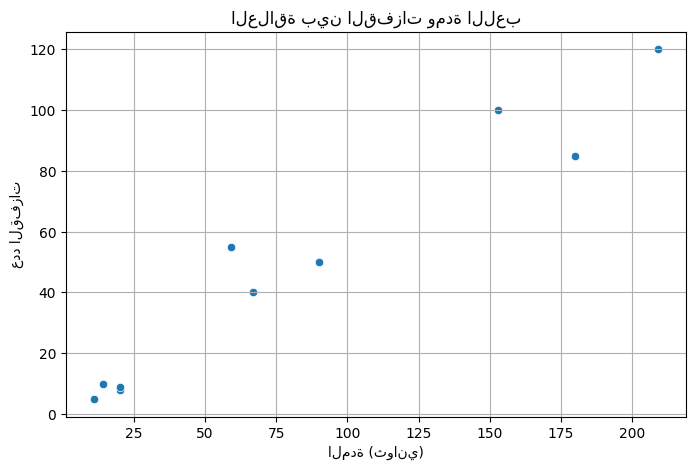

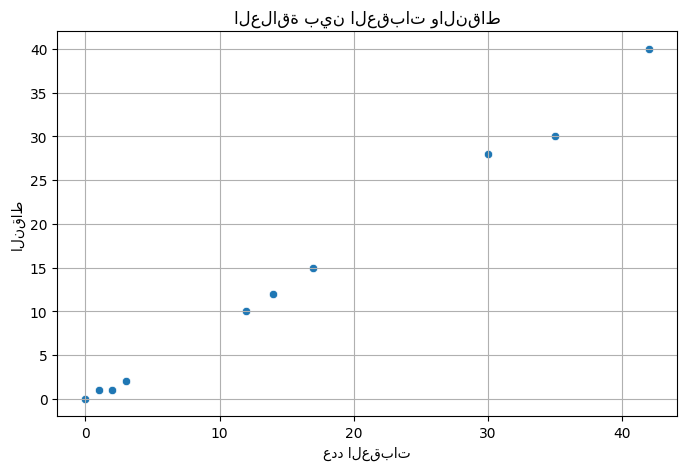

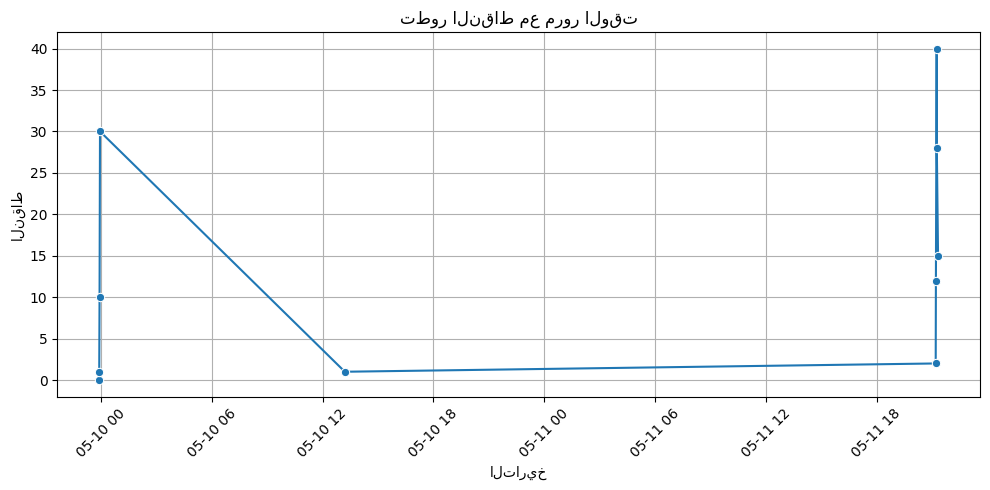

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


print("ملخص إحصائي للبيانات:")
print(df.describe())

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='duration', y='jumps')
plt.title('العلاقة بين القفزات ومدة اللعب')
plt.xlabel('المدة (ثواني)')
plt.ylabel('عدد القفزات')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='obstaclesPassed', y='score')
plt.title('العلاقة بين العقبات والنقاط')
plt.xlabel('عدد العقبات')
plt.ylabel('النقاط')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='score', marker='o')
plt.title('تطور النقاط مع مرور الوقت')
plt.xlabel('التاريخ')
plt.ylabel('النقاط')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


   duration  jumps  score  obstaclesPassed  cluster
0        11      5      0                0        1
1        14     10      1                1        1
2        67     40     10               12        2
3       153    100     30               35        0
4        20      8      1                2        1
5        20      9      2                3        1
6        59     55     12               14        2
7       209    120     40               42        0
8       180     85     28               30        0
9        90     50     15               17        2


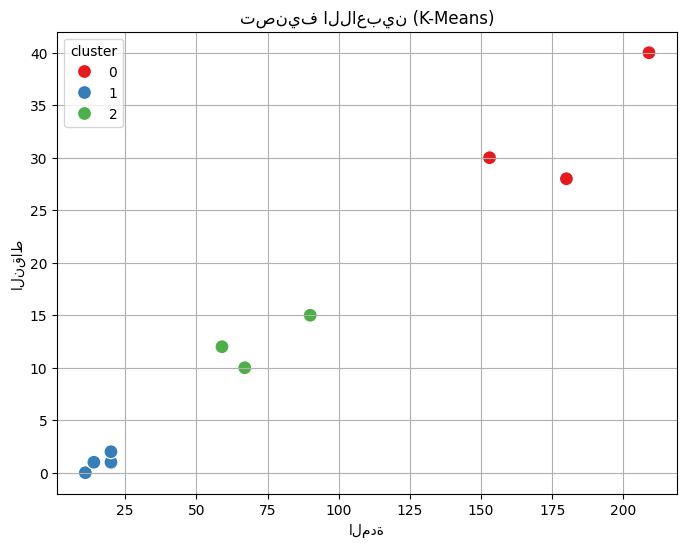

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = df[['duration', 'jumps', 'score', 'obstaclesPassed']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


print(df[['duration', 'jumps', 'score', 'obstaclesPassed', 'cluster']])


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='duration', y='score', hue='cluster', palette='Set1', s=100)
plt.title('تصنيف اللاعبين (K-Means)')
plt.xlabel('المدة')
plt.ylabel('النقاط')
plt.grid(True)
plt.show()

In [4]:
import pandas as pd


data = [
  {"date": "5/9/2025, 11:53:50 PM", "duration": "11 seconds", "jumps": 5, "score": 0, "obstaclesPassed": 0},
  {"date": "5/9/2025, 11:54:16 PM", "duration": "14 seconds", "jumps": 10, "score": 1, "obstaclesPassed": 1},
  {"date": "5/9/2025, 11:55:19 PM", "duration": "67 seconds", "jumps": 40, "score": 10, "obstaclesPassed": 12},
  {"date": "5/9/2025, 11:56:46 PM", "duration": "153 seconds", "jumps": 100, "score": 30, "obstaclesPassed": 35},
  {"date": "5/10/2025, 1:12:26 PM", "duration": "20 seconds", "jumps": 8, "score": 1, "obstaclesPassed": 2},
  {"date": "5/11/2025, 9:12:22 PM", "duration": "20 seconds", "jumps": 9, "score": 2, "obstaclesPassed": 3},
  {"date": "5/11/2025, 9:13:01 PM", "duration": "59 seconds", "jumps": 55, "score": 12, "obstaclesPassed": 14},
  {"date": "5/11/2025, 9:15:31 PM", "duration": "209 seconds", "jumps": 120, "score": 40, "obstaclesPassed": 42},
  {"date": "5/11/2025, 9:16:00 PM", "duration": "180 seconds", "jumps": 85, "score": 28, "obstaclesPassed": 30},
  {"date": "5/11/2025, 9:20:00 PM", "duration": "90 seconds", "jumps": 50, "score": 15, "obstaclesPassed": 17}
]


df = pd.DataFrame(data)
df['duration'] = df['duration'].str.replace(' seconds', '').astype(int)
df['date'] = pd.to_datetime(df['date'])
df['label'] = df['score'].apply(lambda x: 1 if x >= 10 else 0)

total_sessions = len(df)
failures = df[df['label'] == 0]
failure_rate = len(failures) / total_sessions

short_failures = failures[failures['duration'] < 30]
short_failure_rate = len(short_failures) / len(failures) if len(failures) > 0 else 0


print("📢 توصيات التصميم التلقائية:\n")

if failure_rate > 0.5:
    print(f"- أكثر من {failure_rate:.0%} من الجلسات تنتهي بالفشل – راجع توازن اللعبة.")

if short_failure_rate > 0.5:
    print(f"- {short_failure_rate:.0%} من حالات الفشل حدثت خلال أول 30 ثانية – يُنصح بإضافة تعليمات أو مقدمة مبسطة.")

if df['jumps'].mean() > 50:
    print("- متوسط عدد القفزات مرتفع – تأكد أن آلية القفز واضحة وممتعة.")

if df['score'].max() - df['score'].mean() > 20:
    print("- هناك تباين كبير في النقاط – قد تكون بعض العقبات صعبة جدًا على البعض.")

if df['obstaclesPassed'].mean() < 10:
    print("- معظم اللاعبين لم يتجاوزوا عددًا كبيرًا من العقبات – ربما العقبات الأولى صعبة أو غير مفهومة.")


📢 توصيات التصميم التلقائية:

- 100% من حالات الفشل حدثت خلال أول 30 ثانية – يُنصح بإضافة تعليمات أو مقدمة مبسطة.
- هناك تباين كبير في النقاط – قد تكون بعض العقبات صعبة جدًا على البعض.


<ipython-input-4-d1cd41adec1a>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


تقرير التصنيف:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

دقة النموذج: 1.00


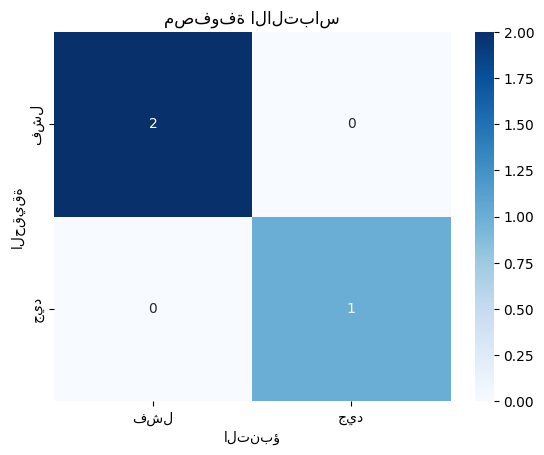

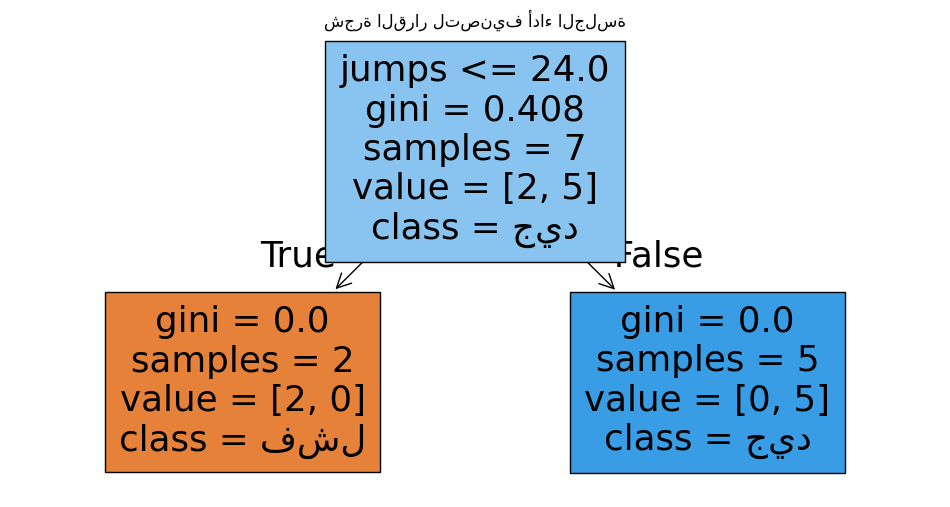

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['duration', 'jumps', 'obstaclesPassed']]
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("تقرير التصنيف:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"دقة النموذج: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["فشل", "جيد"], yticklabels=["فشل", "جيد"])
plt.xlabel("التنبؤ")
plt.ylabel("الحقيقة")
plt.title("مصفوفة الالتباس")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=["فشل", "جيد"], filled=True)
plt.title("شجرة القرار لتصنيف أداء الجلسة")
plt.show()